<a href="https://colab.research.google.com/github/Harshit-tr/AI-Ml-WorkShop/blob/main/DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
user = pd.read_csv("users.csv")
user

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,12,19000,0
1,15810944,Male,11,20000,0
2,15668575,Female,1,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,10,76000,0
...,...,...,...,...,...
94,15786993,Female,45,83000,0
95,15709441,Female,35,44000,0
96,15710257,Female,4,25000,0
97,15582492,Male,5,123000,1


In [ ]:
user["Purchased"].unique()


array([0, 1], dtype=int64)

In [ ]:
X = user.columns.drop('Purchased')
y = user["Purchased"]

In [ ]:
user_encoded = pd.get_dummies(user[X]).astype(int)
user_encoded

,User ID,Age,EstimatedSalary,Gender_Female,Gender_Male
0,15624510,12,19000,0,1
1,15810944,11,20000,0,1
2,15668575,1,43000,1,0
3,15603246,27,57000,1,0
4,15804002,10,76000,0,1
...,...,...,...,...,...
94,15786993,45,83000,1,0
95,15709441,35,44000,1,0
96,15710257,4,25000,1,0
97,15582492,5,123000,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(user_encoded, y, test_size=0.15, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

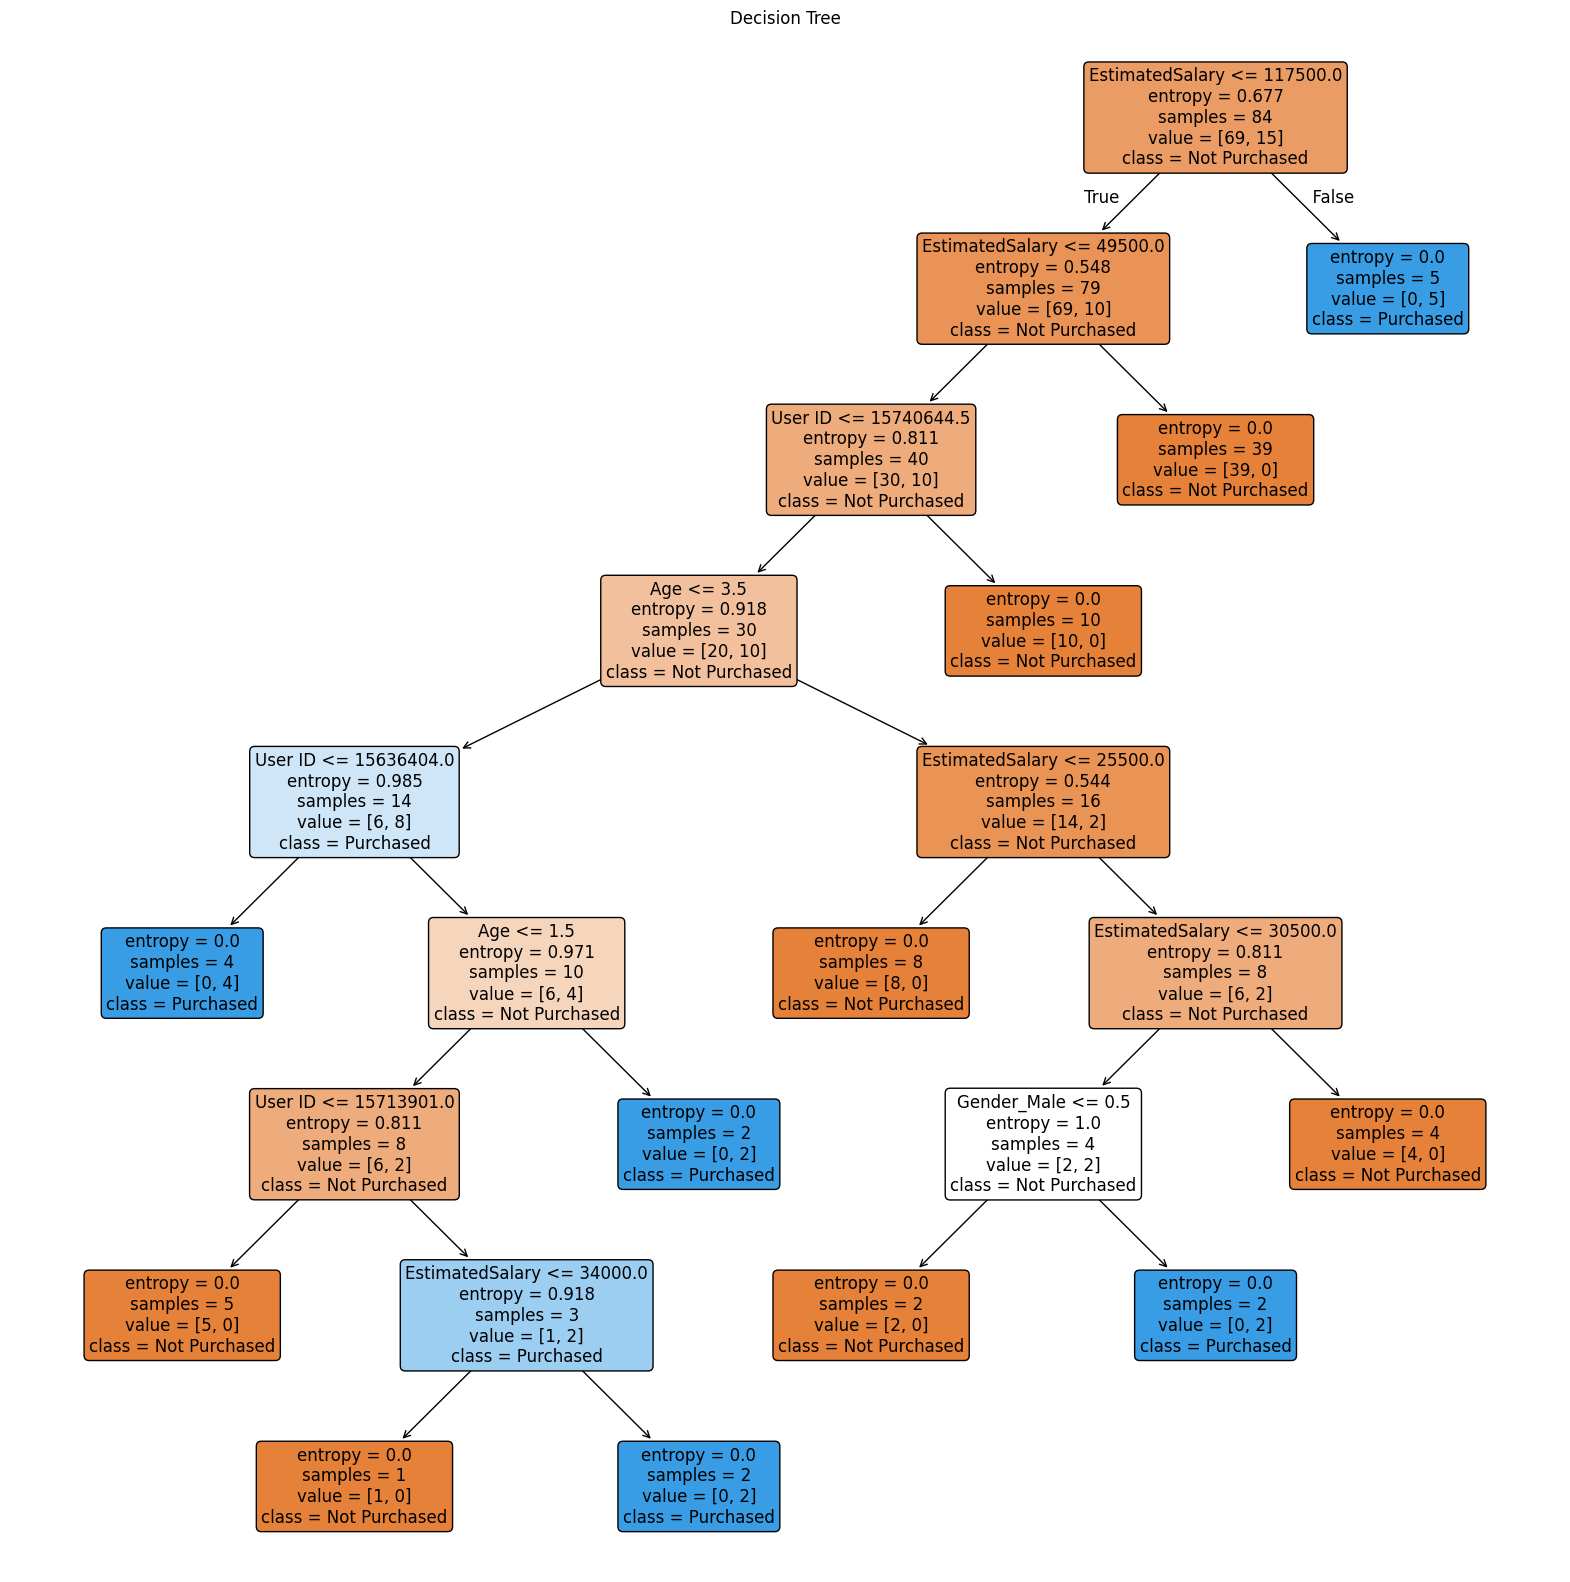

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,20))
plot_tree(model, filled=True, rounded=True, fontsize=12,  feature_names=user_encoded.columns , class_names=['Not Purchased' , 'Purchased'])
plt.title("Decision Tree")
plt.show()
